# Ridge Regression Implementation for Snow Density Estimation 

## Imports and prep

In [1]:
import os
import pandas as pd
import numpy as np
from scipy.io import loadmat
from google.colab import drive

import sklearn.metrics as skm
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pickle

import seaborn as sns
%matplotlib inline

In [2]:
y


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.9 MB 5.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.9 MB 57.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 59.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 55.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 54.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████

In [ ]:
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes

import mpl_scatter_density # adds projection='scatter_density'
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib        as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.io import loadmat

import shapely

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# df = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/processed_data_with_datetime.parquet')
# df.drop(['bulk_density'], axis = 1, inplace = True)
# display(df.head())
# print(df.info())
# print(df['date'].min())
# print(df['date'].max())

In [ ]:
#Clip to dates in 2019, other dates can be for test:
#train = df[(df['date'] >= '2019-01-01') & (df['date'] < '2019-12-31')]
#test = df[df['date'] > '2019-12-31']
#train.to_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
#test.to_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')

## Out of the box ridge regression:

Using only those values that should be understantable to a linear regression model - dropping date, lat and lon. 

In [ ]:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_train = train[['density']]

print(train['date'].max())
print(train['date'].min())
print(len(train))

2019-12-30 00:00:00
2019-01-01 00:00:00
18279579


In [ ]:
try:
  del(df)
except:
  pass

In [ ]:
try:
  del(train)
except:
  pass  
  
try:
  del(test) 
except:
  pass  

In [ ]:
#From https://www.statology.org/ridge-regression-in-python/
#This took 2.5 hours at 0.01, 15 min at 0.1. 

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.0


In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
print(model.intercept_)
print(model.best_score_)
print(model.feature_names_in_)
print(model.coef_)

[-597.932477]
-26.349888229289196
['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf' 'h' 'voc']
[[  2.10264539   1.17917799 300.05183838   0.58190312  -0.95052037
  -68.69555589   9.8631861   -8.64516717]]


In [ ]:
#Pull test set: 
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')

X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_test = test[['density']]
del(test)
y_hat = model.predict(X_test)

In [ ]:
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))
#add RMSE and bias - What is Bias here?

0.14933195576835412
0.25133645223063694
1518.0363124014405


In [ ]:
#Save model: 
#https://www.geeksforgeeks.org/how-to-use-pickle-to-save-and-load-variables-in-python/
# Open a file and use dump()
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/ridge_model_1_no_Norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

In [ ]:
#load test:
# Open the file in binary mode
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/ridge_model_1_no_Norm.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model2 = pickle.load(file)

In [ ]:
print(model2.intercept_)
print(model2.best_score_)
print(model2.feature_names_in_)
print(model2.coef_)

[-597.932477]
-26.349888229289196
['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf' 'h' 'voc']
[[  2.10264539   1.17917799 300.05183838   0.58190312  -0.95052037
  -68.69555589   9.8631861   -8.64516717]]


In [ ]:
#Save output to dataframe for comparison:
results = pd.DataFrame([{'Model': 'ridge_model_1_no_Norm', 'Features': model2.feature_names_in_, 'coef': model2.coef_,\
                         'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat), \
                         'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                         'MSE': skm.mean_squared_error(y_test, y_hat)}])

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

results.head()

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, voc]","[[2.1026453939431855, 1.1791779945835097, 300....",DZ_RidgeReg.ipynb,0.251336,0.149332,28.64899,38.961985,1518.036312


This model has an alpha of zero, meaning this is a simple linear regression. It performs quite poorly, and we know there is not a linear relationship between variables already, meaning Ridge Regression has little chance of producing a usable model. 

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


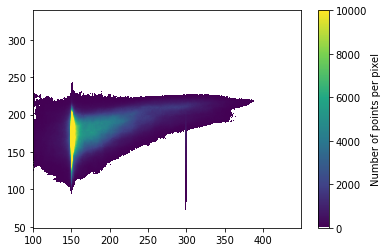

In [ ]:
y_test = y_test.to_numpy()

fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test, y_hat, cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon', 'density']]
del(test)

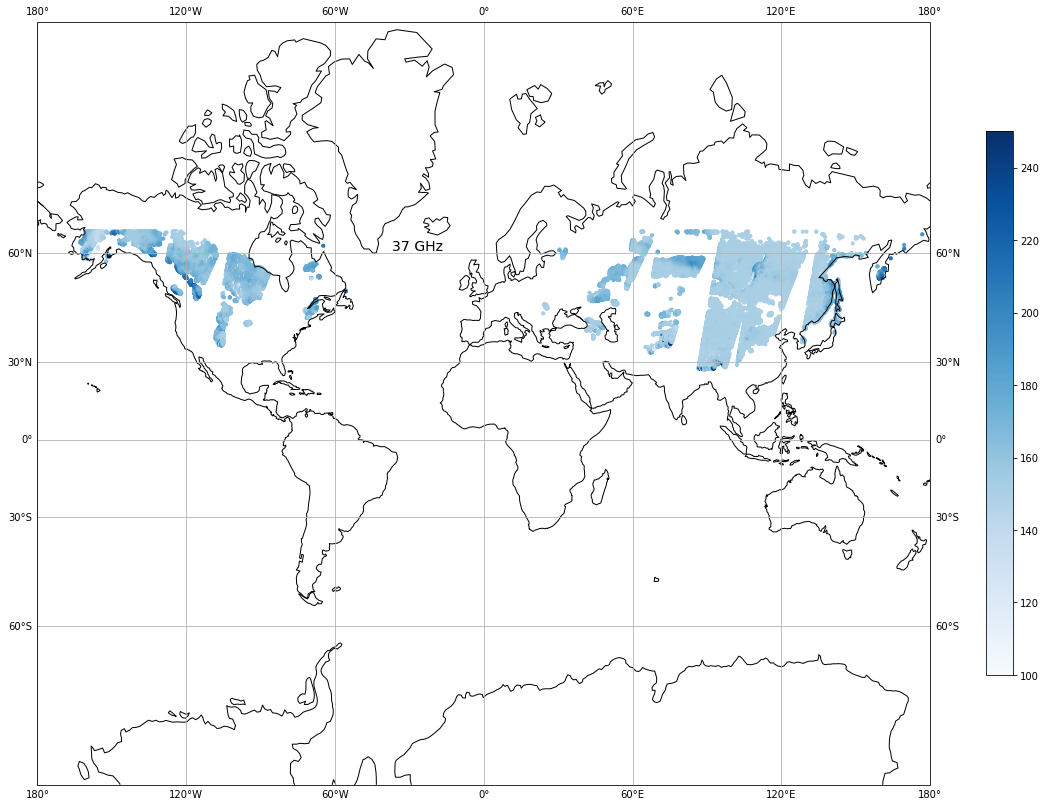

In [ ]:
# %% Visualizing The data - Original
orig_map=plt.cm.get_cmap('bone')
reversed_map = orig_map.reversed()
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
#ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
#Pull test set: 
del(X_sample)

test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon']]
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_test = test[['density']]
del(test)
y_hat = model2.predict(X_test)
del(X_test)
del(y_test)
del(model2)

/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the 

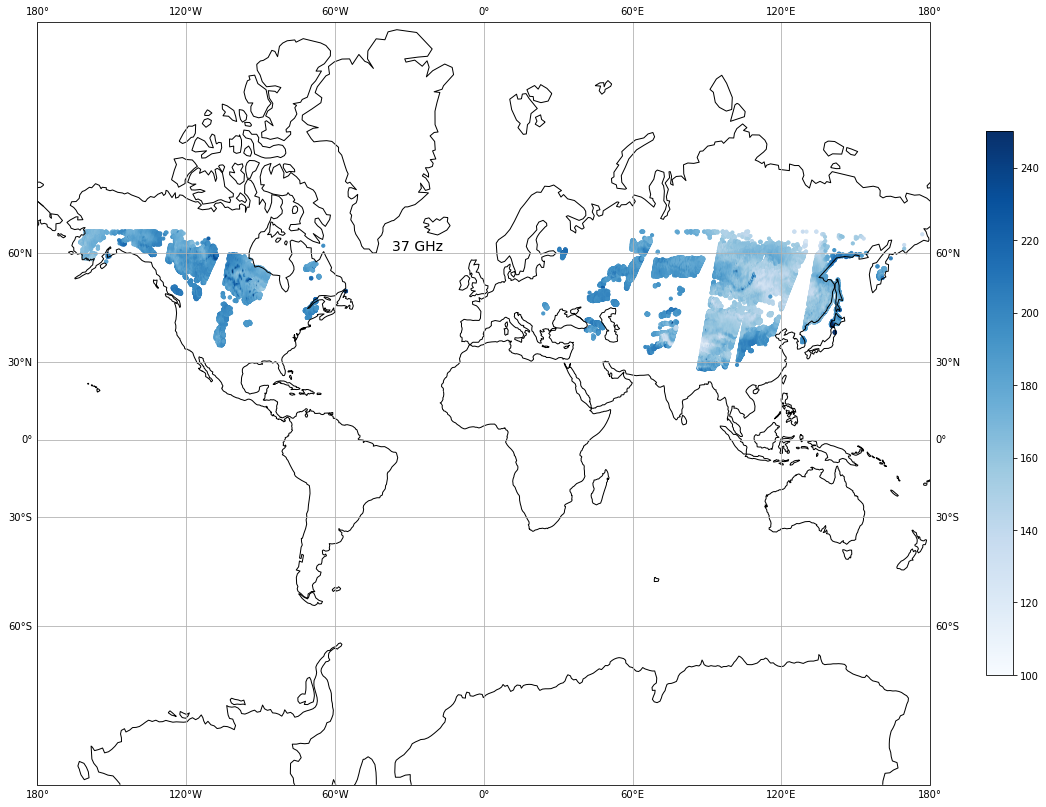

In [ ]:
# %% Visualizing The data - Predicted variables
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=y_hat, vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree())#works
ax1.set_global() #works
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
#ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
try:
  del(X_test)
except:
  pass  
  
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

## Normalize all regressor variables except lat, lon, date 

In [ ]:
#re-run with normalized values:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_train = train[['density']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #This gives an numpy array, loosing all columns. 

In [ ]:
#Build model with normalized inputs:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
print(model.alpha_)
print(model.intercept_)
print(model.best_score_)
print(model.coef_)

0.9
[175.25374253]
-26.349888165998745
[[19.12368799  4.84084189  6.34947445  7.4866816  -8.81432187 -3.22826742
   4.69659673 -3.50017496]]


In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')

X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_test = test[['density']]

del(test)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

y_hat = model.predict(X_test)

In [ ]:
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))

0.14911459550446696
0.23479936511185528
1551.5679286026746


In [ ]:
#Add to csv: 
results = pd.read_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv')

results = results.append({'Model': 'ridge_model_2_NormX', 'Features': ['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc'], 'coef': model.coef_,\
                          'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat),\
                          'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                          'MSE': skm.mean_squared_error(y_test, y_hat)}, ignore_index = True)

display(results)

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf...,[[ 2.10264539 1.17917799 300.05183838 0.5...,DZ_RidgeReg.ipynb,0.251336,0.149332,28.648990,38.961985,1518.036312
1,ridge_model_2_NormX,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, voc]","[[19.123687993125564, 4.84084188896744, 6.3494...",DZ_RidgeReg.ipynb,0.234799,0.149115,28.863078,39.389947,1551.567929


In [ ]:
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/ridge_model_2_NormX.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

In [ ]:
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/ridge_model_2_NormX.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model = pickle.load(file)

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


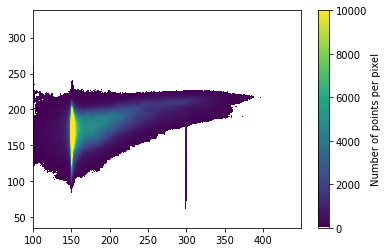

In [ ]:
y_test = y_test.to_numpy()

fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test, y_hat, cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon', 'density']]
del(test)

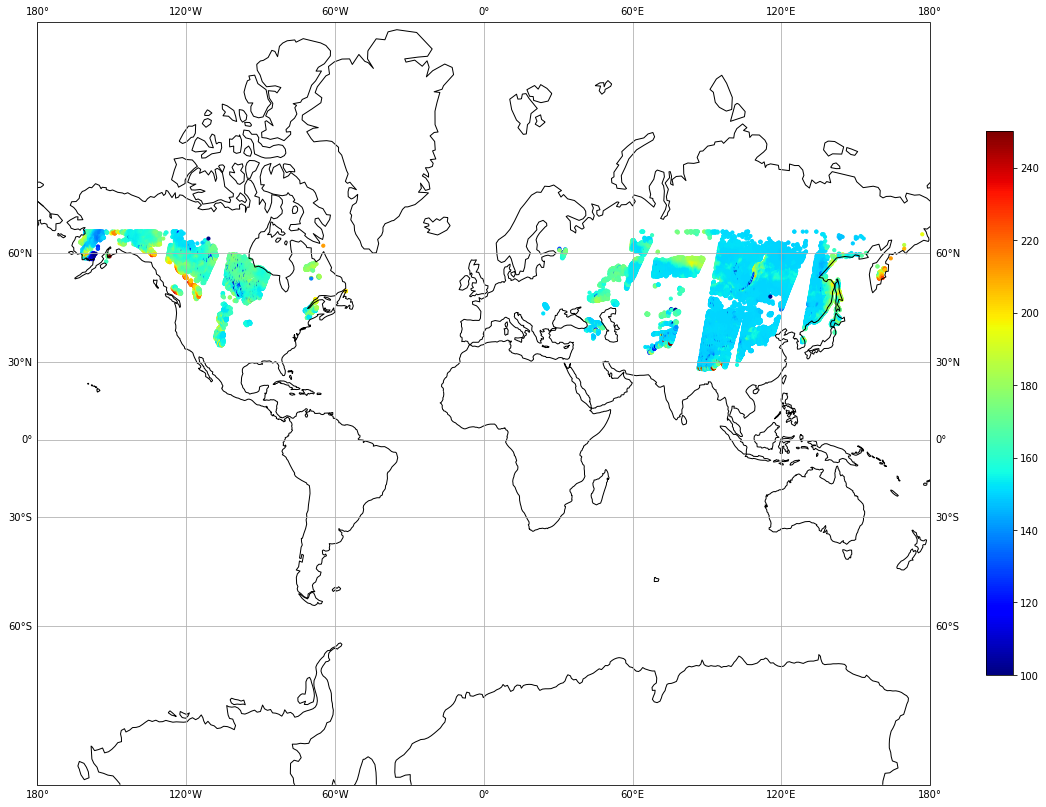

In [ ]:
# %% Visualizing The data - Original
orig_map=plt.cm.get_cmap('bone')
reversed_map = orig_map.reversed()
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["density"], vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree()) #was cmap = 'jet', should be 'Blues'
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
#ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
#Pull test set: 

#load model:
# Open the file in binary mode
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/ridge_model_2_NormX.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model2 = pickle.load(file)

del(X_sample)

test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon']]
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_test = test[['density']]
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

y_hat = model2.predict(X_test)

del(test)
del(X_test)
del(y_test)
del(model2)

/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the 

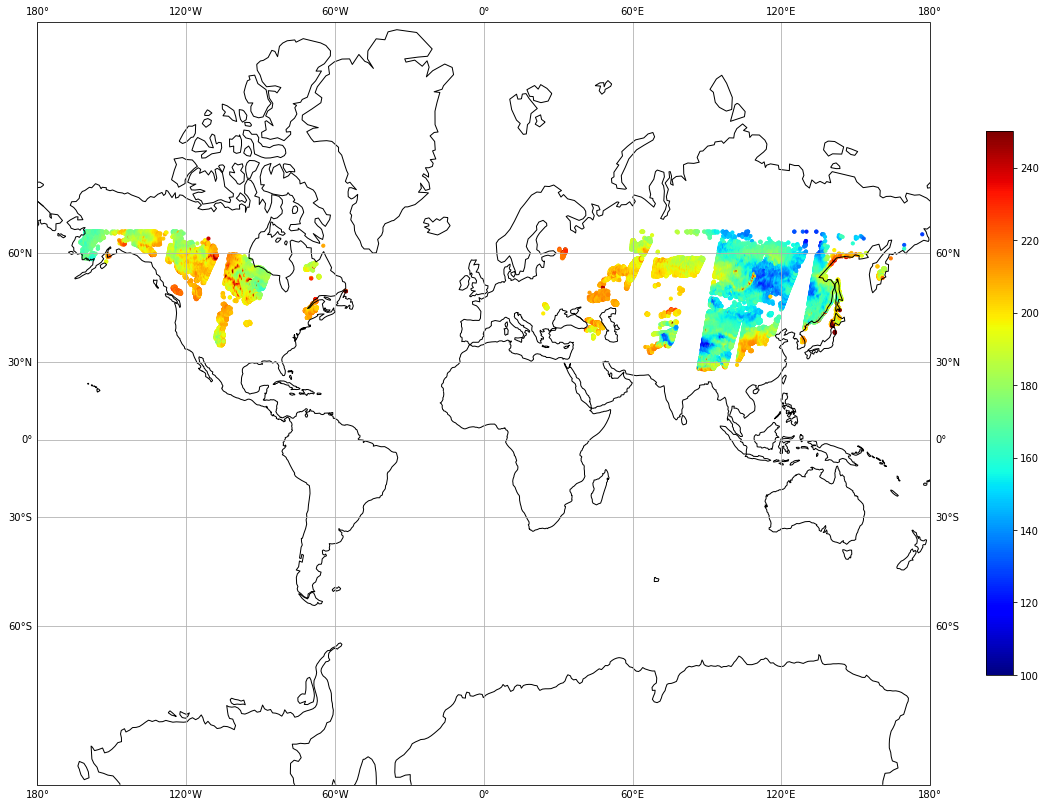

In [ ]:
# %% Visualizing The data - Predicted variables - normalized
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=y_hat, vmin=100, vmax=250, cmap='jet', s=10, transform=ccrs.PlateCarree()) #Should be 'Blues'
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
try:
  del(X_test)
except:
  pass  
  
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

## Normalize both x and y values:

In [ ]:
#re-run with normalized values:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_train = train[['density']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #This gives an numpy array, losing all columns.

scaler2 = StandardScaler()
y_train = scaler2.fit_transform(y_train) 

In [ ]:
del(train)

In [ ]:
#Build model with normalized inputs:
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
print(model.alpha_)
print(model.intercept_)
print(model.best_score_)
print(model.coef_)

0.9
[-7.35843097e-15]
-0.6221372363105392
[[ 0.45152216  0.11429529  0.14991504  0.17676521 -0.20811162 -0.0762214
   0.11088957 -0.08264131]]


In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')

X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc']]
y_test = test[['density']]

del(test)

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)

y_hat = model.predict(X_test)

In [ ]:
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))

5.40384671967537
0.26661334335650955
0.7333866566434901


In [ ]:
#Add to csv: 
results = pd.read_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv')

results = results.append({'Model': 'Ridge_Reg_3_XY_Normalized', 'Features': ['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'voc'], 'coef': model.coef_,\
                          'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat),\
                          'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                          'MSE': skm.mean_squared_error(y_test, y_hat)}, ignore_index = True)
display(results)

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf...,[[ 2.10264539 1.17917799 300.05183838 0.5...,DZ_RidgeReg.ipynb,0.251336,0.149332,28.648990,38.961985,1518.036312
1,ridge_model_2_NormX,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[19.12368799 4.84084189 6.34947445 7.48668...,DZ_RidgeReg.ipynb,0.234799,0.149115,28.863078,39.389947,1551.567929
2,Ridge_Reg_3_XY_Normalized,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, voc]","[[0.45152215907544085, 0.11429528562875292, 0....",DZ_RidgeReg.ipynb,0.266613,5.403847,0.648508,0.856380,0.733387


In [ ]:
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_3_XY_Normalized.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

In [ ]:
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_3_XY_Normalized.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model = pickle.load(file)

In [ ]:
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

# VOD

## VOD not normalized: 

In [ ]:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_train = train[[ 'voc']]

del(train)

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
#Pull test set: 
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_test = test[['voc']]

del(test)

y_hat = model.predict(X_test)

In [ ]:
print(model.alpha_)
print(model.intercept_)
print(model.best_score_)
print(model.feature_names_in_)
print(model.coef_)

0.9
[-2.02244141]
-0.24545514521697276
['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf' 'h' 'density']
[[ 4.74022750e-03  1.05835527e-02  2.02122436e+00  3.48185693e-02
  -3.87261735e-02 -1.39260143e+00 -2.18919366e-01 -7.51827464e-04]]


In [ ]:
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))

69985285750646.05
0.2793633226682132
0.1031123974709868


In [ ]:
results = pd.read_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv')

results = results.append({'Model': 'Ridge_Reg_VOC_1_no_Norm', 'Features': ['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density'], 'coef': model.coef_,\
                          'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat),\
                          'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                          'MSE': skm.mean_squared_error(y_test, y_hat)}, ignore_index = True)

display(results)

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf...,[[ 2.10264539 1.17917799 300.05183838 0.5...,DZ_RidgeReg.ipynb,0.251336,1.493320e-01,28.648990,38.961985,1518.036312
1,ridge_model_2_NormX,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[19.12368799 4.84084189 6.34947445 7.48668...,DZ_RidgeReg.ipynb,0.234799,1.491146e-01,28.863078,39.389947,1551.567929
2,Ridge_Reg_3_XY_Normalized,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 0.45152216 0.11429529 0.14991504 0.17676...,DZ_RidgeReg.ipynb,0.266613,5.403847e+00,0.648508,0.856380,0.733387
3,Ridge_Reg_VOC_1_no_Norm,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, d...","[[0.004740227496307591, 0.010583552719247345, ...",DZ_RidgeReg.ipynb,0.279363,6.998529e+13,0.236484,0.321111,0.103112


In [ ]:
# Open a file and use dump()
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_VOC_1_no_Norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


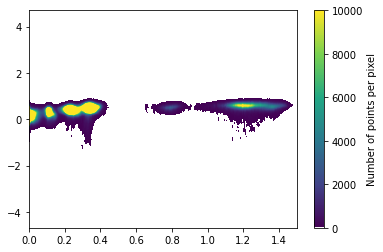

In [ ]:
y_test = y_test.to_numpy()

fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)


ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test, y_hat, cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon', 'voc']]
del(test)

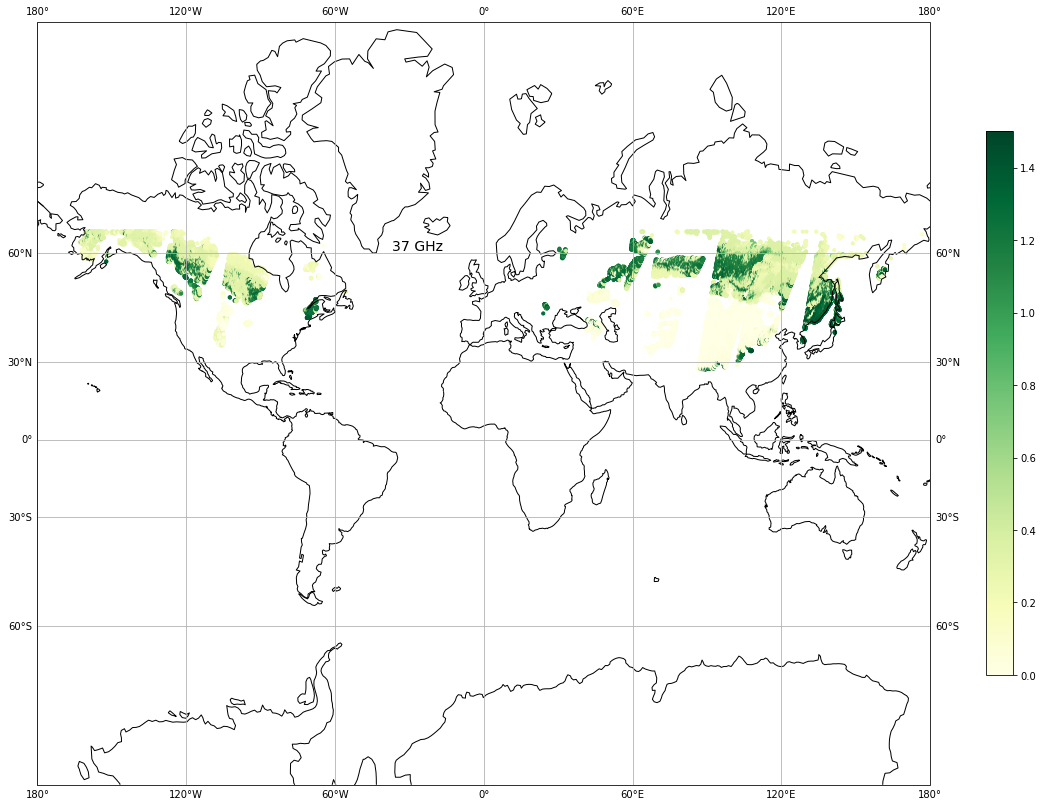

In [ ]:
# %% Visualizing VOD - Original

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["voc"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree()) 
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
#Pull test set: 

#load model:
# Open the file in binary mode
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_VOC_1_no_Norm.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model2 = pickle.load(file)

del(X_sample)

test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon']]
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_test = test[['voc']]

y_hat = model2.predict(X_test)

del(test)
del(X_test)
del(y_test)
del(model2)

/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:549: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  elif len(intersection) > 4:
/usr/local/lib/python3.8/dist-packages/cartopy/mpl/gridliner.py:556: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  xy = np.append(intersection[0], intersection[-1],
<__array_function__ internals>:5: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:4817: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the 

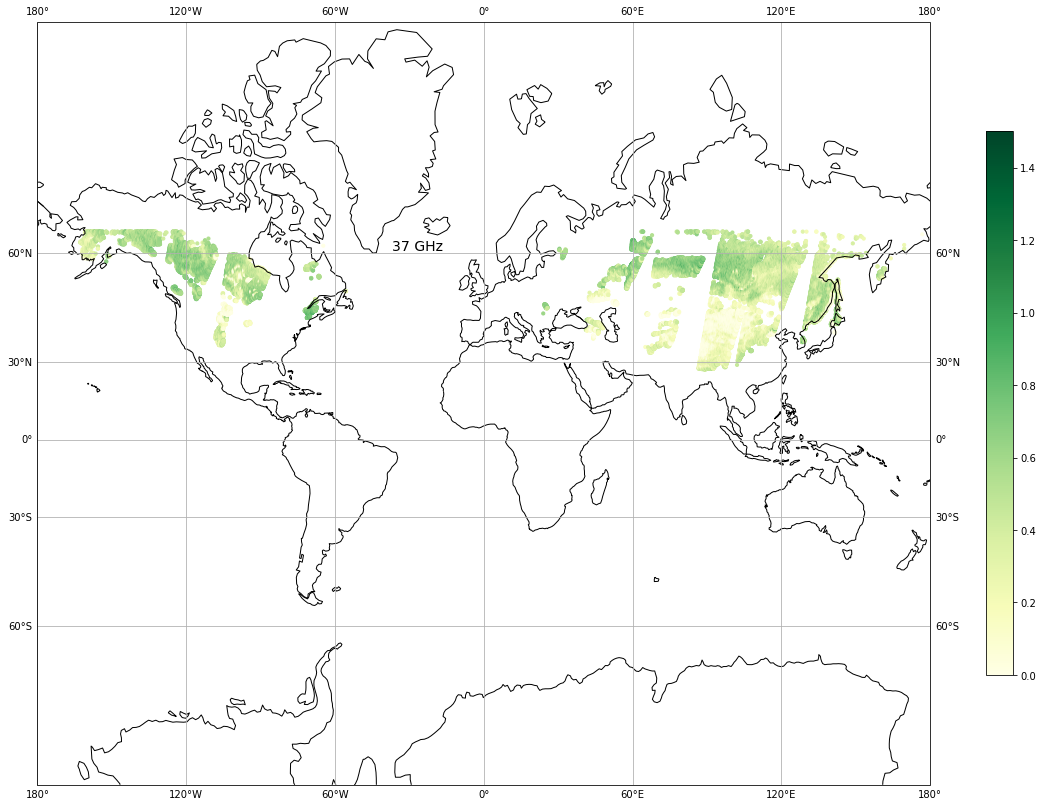

In [ ]:
# %% Visualizing The data - Predicted variables
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=y_hat, vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree()) 
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
ax1.text(-37, 60.5, '37 GHz', fontsize=14, transform=ccrs.PlateCarree())
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
try:
  del(X_test)
except:
  pass  
  
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

## VOD X Normalized

In [ ]:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')

X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_train = train[[ 'voc']]

del(train)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
print(model.alpha_)
print(model.intercept_)
print(model.best_score_)
#print(model.feature_names_in_)
print(model.coef_)

0.9
[0.35727476]
-0.245455559532308
[[ 0.0431123   0.04344734  0.042782    0.44796253 -0.3591073  -0.06544973
  -0.10424268 -0.03184381]]


In [ ]:
#Pull test set: 
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')

X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_test = test[['voc']]

del(test)

X_test = scaler.fit_transform(X_test)

y_hat = model.predict(X_test)

In [ ]:
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))

68519059104660.14
0.28180103969044423
0.1027635963976793


In [ ]:
results = pd.read_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv')

results = results.append({'Model': 'Ridge_Reg_VOC_2_X_Norm', 'Features': ['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density'], 'coef': model.coef_,\
                          'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat),\
                          'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                          'MSE': skm.mean_squared_error(y_test, y_hat)}, ignore_index = True)

display(results)

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf...,[[ 2.10264539 1.17917799 300.05183838 0.5...,DZ_RidgeReg.ipynb,0.251336,1.493320e-01,28.648990,38.961985,1518.036312
1,ridge_model_2_NormX,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[19.12368799 4.84084189 6.34947445 7.48668...,DZ_RidgeReg.ipynb,0.234799,1.491146e-01,28.863078,39.389947,1551.567929
2,Ridge_Reg_3_XY_Normalized,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 0.45152216 0.11429529 0.14991504 0.17676...,DZ_RidgeReg.ipynb,0.266613,5.403847e+00,0.648508,0.856380,0.733387
3,Ridge_Reg_VOC_1_no_Norm,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 4.74022750e-03 1.05835527e-02 2.02122436e...,DZ_RidgeReg.ipynb,0.279363,6.998529e+13,0.236484,0.321111,0.103112
4,Ridge_Reg_VOC_2_X_Norm,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, d...","[[0.043112302978988916, 0.043447340617819054, ...",DZ_RidgeReg.ipynb,0.281801,6.851906e+13,0.233670,0.320568,0.102764


In [ ]:
# Open a file and use dump()
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_VOC_2_X_Norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/usr/local/lib/python3.7/dist-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


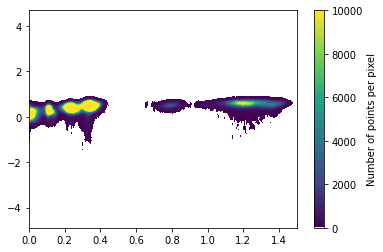

In [ ]:
y_test = y_test.to_numpy()

fig = plt.figure()

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
density = ax.scatter_density(y_test, y_hat, cmap=white_viridis, vmin=0, vmax=10000)
fig.colorbar(density, label='Number of points per pixel')
plt.show()

In [ ]:
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon', 'voc']]
del(test)

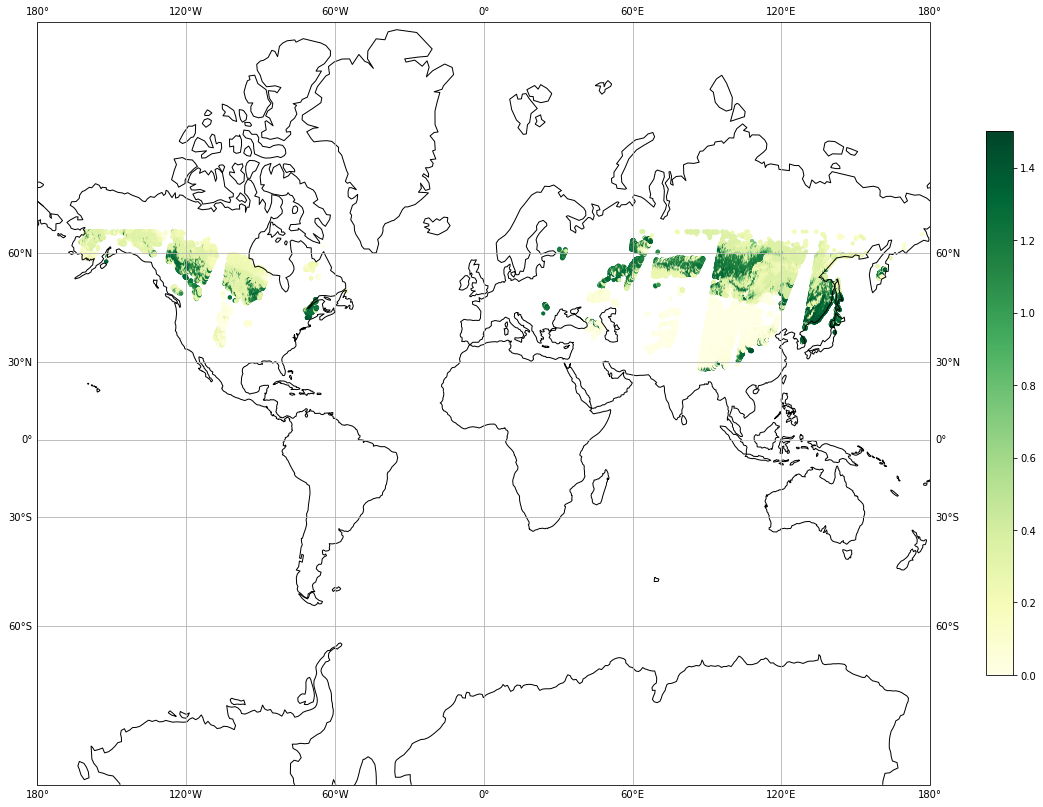

In [ ]:
# %% Visualizing VOD - Original

fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=X_sample["voc"], vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree()) 
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
#Pull test set: 

#load model:
# Open the file in binary mode
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_VOC_2_X_Norm.pkl', 'rb') as file:
      
    # Call load method to deserialze
    model2 = pickle.load(file)

del(X_sample)

test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
test = test[test['date'] == '2020-01-01']
X_sample = test[['lat', 'lon']]
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_test = test[['voc']]

scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

y_hat = model2.predict(X_test)

del(test)
del(X_test)
del(y_test)
del(model2)

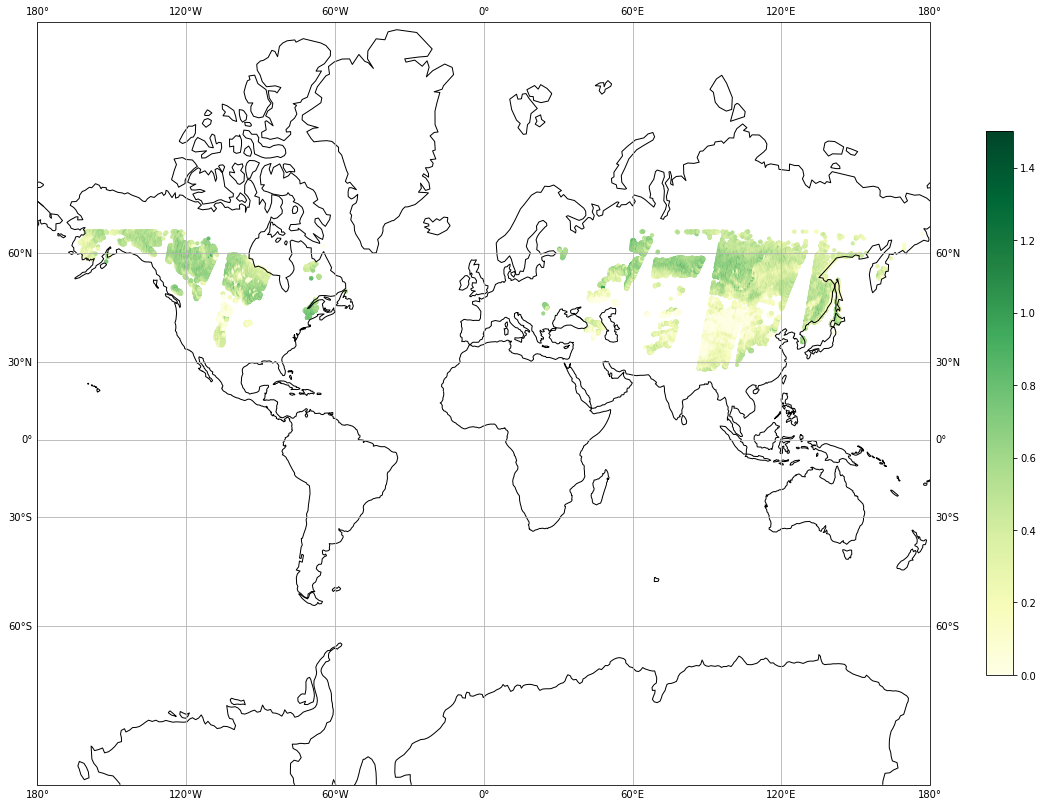

In [ ]:
# %% Visualizing The data - Predicted variables - normalized
fig = plt.figure(figsize=(20, 20))
ax1 = plt.subplot(111, projection=ccrs.Mercator())
#plot1 = plt.contourf(Lon, Lat, Data1, 10, cmap = 'Blues', vmin=100, vmax=450, transform=ccrs.PlateCarree())
plot1 = plt.scatter(X_sample["lon"], X_sample["lat"], c=y_hat, vmin=0, vmax=1.5, cmap='YlGn', s=10, transform=ccrs.PlateCarree()) 
ax1.set_global() 
ax1.coastlines() #Had to rebuild shapely (!pip uninstall shapely, !pip install shapely --no-binary shapely)
ax1.gridlines(draw_labels = True)
#ax1.set_extent([-180, 180, -90, 90])
#ax1.set_extent([-180, 180, -90, 90], ccrs.PlateCarree())  
cbar = plt.colorbar(plot1, shrink = .5)

In [ ]:
try:
  del(X_test)
except:
  pass  
  
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

## VOC XY Normalized

In [ ]:
train = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/train.parquet')
X_train = train[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_train = train[[ 'voc']]

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
scaler2 = StandardScaler()
y_train = scaler2.fit_transform(y_train)

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=0)

#define model
model = RidgeCV(alphas=np.arange(0, 1, 0.1), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X_train, y_train)

RidgeCV(alphas=array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=0),
        scoring='neg_mean_absolute_error')

In [ ]:
try:
  del(X_train)
except:
  pass  
  
try:
  del(y_train) 
except:
  pass 

In [ ]:
#Pull test set: 
test = pd.read_parquet('/content/drive/Shareddrives/AI For Earth/Datasets/test.parquet')
X_test = test[['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density']]
y_test = test[['voc']]

del(test)

X_test = scaler.fit_transform(X_test)
y_test = scaler2.fit_transform(y_test)

y_hat = model.predict(X_test)

In [ ]:
print(model.alpha_)
print(model.intercept_)
print(model.best_score_)
#print(model.feature_names_in_)
print(model.coef_)
print("----")
print(skm.mean_absolute_percentage_error(y_test, y_hat))
print(skm.r2_score(y_test, y_hat))
print(skm.mean_squared_error(y_test, y_hat))

0.9
[-6.50012096e-15]
-0.6062563869438287
[[ 0.10648408  0.1073116   0.10566826  1.10643306 -0.88696747 -0.16165581
  -0.25747142 -0.07865176]]
----
21.574387177143596
0.2853290664336824
0.7146709335663181


In [ ]:
results = pd.read_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv')

results = results.append({'Model': 'Ridge_Reg_VOC_3_XY_Norm', 'Features': ['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv', 'cf', 'h', 'density'], 'coef': model.coef_,\
                          'source file': 'DZ_RidgeReg.ipynb', 'R2':skm.r2_score(y_test, y_hat), 'MAPE':skm.mean_absolute_percentage_error(y_test, y_hat),\
                          'MAE': skm.mean_absolute_error(y_test, y_hat), 'RMSE': skm.mean_squared_error(y_test, y_hat, squared = False), \
                          'MSE': skm.mean_squared_error(y_test, y_hat)}, ignore_index = True)

display(results)

results.to_csv('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/results.csv', index=False)

,Model,Features,coef,source file,R2,MAPE,MAE,RMSE,MSE
0,ridge_model_1_no_Norm,['snowtemp' 'soiltemp' 'omega' 'Tbh' 'Tbv' 'cf...,[[ 2.10264539 1.17917799 300.05183838 0.5...,DZ_RidgeReg.ipynb,0.251336,1.493320e-01,28.648990,38.961985,1518.036312
1,ridge_model_2_NormX,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[19.12368799 4.84084189 6.34947445 7.48668...,DZ_RidgeReg.ipynb,0.234799,1.491146e-01,28.863078,39.389947,1551.567929
2,Ridge_Reg_3_XY_Normalized,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 0.45152216 0.11429529 0.14991504 0.17676...,DZ_RidgeReg.ipynb,0.266613,5.403847e+00,0.648508,0.856380,0.733387
3,Ridge_Reg_VOC_1_no_Norm,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 4.74022750e-03 1.05835527e-02 2.02122436e...,DZ_RidgeReg.ipynb,0.279363,6.998529e+13,0.236484,0.321111,0.103112
4,Ridge_Reg_VOC_2_X_Norm,"['snowtemp', 'soiltemp', 'omega', 'Tbh', 'Tbv'...",[[ 0.0431123 0.04344734 0.042782 0.44796...,DZ_RidgeReg.ipynb,0.281801,6.851906e+13,0.233670,0.320568,0.102764
5,Ridge_Reg_VOC_3_XY_Norm,"[snowtemp, soiltemp, omega, Tbh, Tbv, cf, h, d...","[[0.10648407836706145, 0.10731159561211699, 0....",DZ_RidgeReg.ipynb,0.285329,2.157439e+01,0.597757,0.845382,0.714671


In [ ]:
# Open a file and use dump()
with open('/content/drive/Shareddrives/AI For Earth/Codes/Ridge Regression/Ridge_Reg_VOC_3_XY_Norm.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(model, file)

In [ ]:
try:
  del(X_test)
except:
  pass  
  
try:
  del(y_test) 
except:
  pass 

try:
  del(y_hat) 
except:
  pass 

In [ ]:
#Extenstions: 
#Plot density
#Plot voc